# Order-to-cash SAP

### Table of Contents

* [Data Extraction Checklist](#DataExtractionChecklist)
* [Data Quality Check](#DataQualityCheck)
* [Data Transformation](#DataTransformation)
* [Process Discovery](#ProcessDiscovery)
    * [Variant Analysis](#VariantAnalysis)
    * [Process Flow Graph](#ProcessFlowGraph)
    * [Transition Matrix](#TransitionMatrix)
* [Timing Analysis](#TimingAnalysis)
    * [Case Duration](#CaseDuration)
    * [Event Duration](#EventDuration)
* [Open Orders](#OpenOrders)

## Data Extraction Checklist<a class="anchor" id="DataExtractionChecklist"></a>

### 1. Which Process?

##### Order-to-Cash process

### 2. Questions about Process?
The question we are to answer relates to conformance. 


### 3. Which IT System?
SAP.

### 4. Case ID?
The _CASE_KEY to be used is the case column.

### 5. Activities
The ACTIVITY_EN column contains 28 activities which were performed over the period. These activities include:
1. Create Delivery
2. Goods Issue
3. Create Sales Order Item
4. Create Invoice
5. Change Scheduled date
6. Pro forma invoice
7. Credit Check Release
8. Remove Reason for rejection
9. Create Quotation
10. Delivery Block removed
11. Change Shipping Terms
12. Delivery Block set
13. Change Net Price
14. Set Reason for rejection
15. Delivery Block changed
16. Credit Check Denied
17. Change Route
18. Credit memo
19. Billing Block removed
20. Change Material
21. Billing Block set
22. Change Reason for rejection
23. Invoice cancellation
24. Debit memo
25. Change Customer
26. Billing Block changed
27. Credit memo cancellation
28. Change Delivery Amount

### 6. Timestamps
There EVENTTIME column was used as the timestamp.

### 7. Other attributes
The dataset contains other attributes, however they were not used in this analysis.


### 8. Selection method
To get a thorough understanding of the process, it is important to look at the finished cases. From the review of the dataset, it contains 82,906 cases and there were initially about 29 start/end activities. It was assumed that this was due to the way the data was extracted from the SAP system. The dataset was extracted for events from 14th February 2007 to 13th February 2010, without considering if these cases starts or ends on these dates. 

The analysis carried out indicated that there are three posible start events (Create Sales Order Item, Create Delivery and Create Quotation) and one end event (Create Invoice). The eventlog was then filtered for cases which meets this scenario.

In addition, the cases which starts with these events and do not end with Create Invoice are considered as open cases and were considered for further analysis.


### 9. Timeframe
The dataset contains cases spaning 3 years from 14th February 2007 to 13th February 2010

In [1]:
import pandas as pd
import graphviz

In [2]:
df = pd.read_csv('Activities.csv',sep=';')
df

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,ACTIVITY_DETAIL_EN,_SORTING,USER_NAME,USER_TYPE,CHANGED_TABLE,CHANGED_FIELD,CHANGED_FROM,CHANGED_TO,CHANGE_NUMBER,TRANSACTION_CODE
0,181743,Create Delivery,30.01.2009 10:16,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
1,253499,Create Delivery,27.02.2009 03:33,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
2,628324,Create Delivery,13.07.2009 03:39,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
3,502214,Create Delivery,07.05.2009 03:39,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
4,933370,Create Delivery,29.10.2009 10:18,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483059,921309,Create Delivery,26.10.2009 09:18,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483060,775200,Create Delivery,24.09.2009 08:16,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483061,959593,Create Delivery,23.11.2009 03:33,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483062,588450,Create Delivery,26.06.2009 14:17,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483064 entries, 0 to 483063
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _CASE_KEY           483064 non-null  int64  
 1   ACTIVITY_EN         483064 non-null  object 
 2   EVENTTIME           483064 non-null  object 
 3   ACTIVITY_DETAIL_EN  0 non-null       float64
 4   _SORTING            342544 non-null  float64
 5   USER_NAME           0 non-null       float64
 6   USER_TYPE           483064 non-null  object 
 7   CHANGED_TABLE       0 non-null       float64
 8   CHANGED_FIELD       0 non-null       float64
 9   CHANGED_FROM        398779 non-null  float64
 10  CHANGED_TO          398779 non-null  float64
 11  CHANGE_NUMBER       0 non-null       float64
 12  TRANSACTION_CODE    0 non-null       float64
dtypes: float64(9), int64(1), object(3)
memory usage: 47.9+ MB


In [4]:
df.isnull().sum()

_CASE_KEY                  0
ACTIVITY_EN                0
EVENTTIME                  0
ACTIVITY_DETAIL_EN    483064
_SORTING              140520
USER_NAME             483064
USER_TYPE                  0
CHANGED_TABLE         483064
CHANGED_FIELD         483064
CHANGED_FROM           84285
CHANGED_TO             84285
CHANGE_NUMBER         483064
TRANSACTION_CODE      483064
dtype: int64

## Data Quality Check <a class="anchor" id="DataQualityCheck"></a>

#### 1. Any errors during import?
After importing the event log, it was noticed that the startTime is not recognised as a timestamp in python.

#### 2. Empty or missing values in the dataset?

There were empty and missing values in the dataset in various columns. These columns were not used for the analysis.


#### 3.  Disclaimer:
No process owner was contacted to gain further understanding of other columns

## Data Transformation<a class="anchor" id="DataTransformation"></a>

### Correcting the timestamp format

In [5]:
df['EVENTTIME'] = pd.to_datetime(df['EVENTTIME'], dayfirst=True)

In [6]:
df.head()

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,ACTIVITY_DETAIL_EN,_SORTING,USER_NAME,USER_TYPE,CHANGED_TABLE,CHANGED_FIELD,CHANGED_FROM,CHANGED_TO,CHANGE_NUMBER,TRANSACTION_CODE
0,181743,Create Delivery,2009-01-30 10:16:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
1,253499,Create Delivery,2009-02-27 03:33:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
2,628324,Create Delivery,2009-07-13 03:39:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
3,502214,Create Delivery,2009-05-07 03:39:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
4,933370,Create Delivery,2009-10-29 10:18:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.EVENTTIME.min()

Timestamp('2007-02-14 08:56:00')

In [8]:
df.EVENTTIME.max()

Timestamp('2010-02-13 11:15:00')

In [9]:
df['ACTIVITY_EN'].value_counts()

Create Delivery                84285
Goods Issue                    84285
Create Sales Order Item        82906
Create Invoice                 82471
Change Scheduled date          48476
Pro forma invoice              43004
Credit Check Release           14354
Remove Reason for rejection    13938
Create Quotation                5413
Delivery Block removed          3937
Change Shipping Terms           3631
Delivery Block set              3190
Change Net Price                2686
Set Reason for rejection        2680
Delivery Block changed          2295
Credit Check Denied             2206
Change Route                    1043
Credit memo                      643
Billing Block removed            587
Change Material                  366
Billing Block set                272
Change Reason for rejection      183
Invoice cancellation             141
Debit memo                        29
Change Customer                   28
Billing Block changed              6
Credit memo cancellation           4
C

In [10]:
df.columns

Index(['_CASE_KEY', 'ACTIVITY_EN', 'EVENTTIME', 'ACTIVITY_DETAIL_EN',
       '_SORTING', 'USER_NAME', 'USER_TYPE', 'CHANGED_TABLE', 'CHANGED_FIELD',
       'CHANGED_FROM', 'CHANGED_TO', 'CHANGE_NUMBER', 'TRANSACTION_CODE'],
      dtype='object')

### Filtering for completed cases


In [11]:
df_2 = df.copy()
df_2

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,ACTIVITY_DETAIL_EN,_SORTING,USER_NAME,USER_TYPE,CHANGED_TABLE,CHANGED_FIELD,CHANGED_FROM,CHANGED_TO,CHANGE_NUMBER,TRANSACTION_CODE
0,181743,Create Delivery,2009-01-30 10:16:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
1,253499,Create Delivery,2009-02-27 03:33:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
2,628324,Create Delivery,2009-07-13 03:39:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
3,502214,Create Delivery,2009-05-07 03:39:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
4,933370,Create Delivery,2009-10-29 10:18:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483059,921309,Create Delivery,2009-10-26 09:18:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483060,775200,Create Delivery,2009-09-24 08:16:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483061,959593,Create Delivery,2009-11-23 03:33:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483062,588450,Create Delivery,2009-06-26 14:17:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def func(x):
    # Get the last valid index (last activity per case)
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]

def activity_list(df, case_id, activities):
    # Get the last and first activity for each case
    activities_list = df.copy()
    activities_list['Count'] = activities_list.groupby(case_id).cumcount()+1
    activities_list = activities_list.pivot(index=case_id, columns='Count', values=activities)

    activities_list['Last Activity'] = activities_list.apply(func, axis=1)
    activities_list['First Activity'] = activities_list[1]
    return activities_list

#### Dataframe filtering

* The eventlog was filtered for cases begining with any of the three events:
    1. Create Sales Order Item
    2. Create Delivery
    3. Create Quotation
* The eventlog was then filtered for cases ending with Create Invoice

After this, we were left with 66,299 cases.

In [13]:
df_xtract = df_2.copy()
df_xtract = df_xtract.sort_values(by=['_CASE_KEY','EVENTTIME'],ascending=True).reset_index(drop=True)
df_xtract = activity_list(df_xtract,'_CASE_KEY','ACTIVITY_EN')
df_xtract = df_xtract[(df_xtract['First Activity'] == 'Create Sales Order Item')
                      | (df_xtract['First Activity'] == 'Create Delivery')
                         | (df_xtract['First Activity'] == 'Create Quotation')]
df_xtract

Count,1,2,3,4,5,6,7,8,9,10,...,229,230,231,232,233,234,235,236,Last Activity,First Activity
_CASE_KEY,,,,,,,,,,,,,,,,,,,,,
140449,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
140483,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Delivery
140493,Create Quotation,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Quotation
140499,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Delivery
140502,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166902,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
1166912,Create Sales Order Item,Credit Check Release,Remove Reason for rejection,Change Net Price,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Change Net Price,Create Sales Order Item
1166915,Create Sales Order Item,Remove Reason for rejection,Credit Check Release,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Credit Check Release,Create Sales Order Item


In [14]:
df_xtract_2 = df_xtract[(df_xtract['Last Activity'] == 'Create Invoice')]
df_xtract_2

Count,1,2,3,4,5,6,7,8,9,10,...,229,230,231,232,233,234,235,236,Last Activity,First Activity
_CASE_KEY,,,,,,,,,,,,,,,,,,,,,
140449,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
140483,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Delivery
140493,Create Quotation,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Quotation
140499,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Delivery
140502,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166773,Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Pro forma invoice,Create Invoice,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
1166852,Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Create Invoice,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
1166853,Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Create Invoice,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Create Invoice,Create Sales Order Item


In [15]:
df_xtract_2 = df_xtract_2.reset_index()
df_xtract_2 = df_xtract_2[['_CASE_KEY']]
df_xtract_2

Count,_CASE_KEY
0,140449
1,140483
2,140493
3,140499
4,140502
...,...
66294,1166773
66295,1166852
66296,1166853
66297,1166893


In [16]:
df_final = df_xtract_2.merge(df_2, on='_CASE_KEY')
df_final

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,ACTIVITY_DETAIL_EN,_SORTING,USER_NAME,USER_TYPE,CHANGED_TABLE,CHANGED_FIELD,CHANGED_FROM,CHANGED_TO,CHANGE_NUMBER,TRANSACTION_CODE
0,140449,Goods Issue,2009-01-02 04:30:00,NaN,40.0,NaN,B,NaN,NaN,1.0,1.0,NaN,NaN
1,140449,Create Invoice,2009-01-02 11:07:00,NaN,40.0,NaN,B,NaN,NaN,1.0,1.0,NaN,NaN
2,140449,Create Sales Order Item,2009-01-02 03:10:00,NaN,30.0,NaN,B,NaN,NaN,1.0,1.0,NaN,NaN
3,140449,Create Delivery,2009-01-02 03:30:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
4,140483,Create Invoice,2009-01-02 11:07:00,NaN,40.0,NaN,B,NaN,NaN,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369921,1166893,Create Delivery,2010-02-01 09:18:00,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
369922,1166902,Goods Issue,2010-02-04 04:37:00,NaN,40.0,NaN,B,NaN,NaN,1.0,1.0,NaN,NaN
369923,1166902,Create Invoice,2010-02-04 08:50:00,NaN,40.0,NaN,B,NaN,NaN,1.0,1.0,NaN,NaN
369924,1166902,Create Sales Order Item,2010-01-31 16:44:00,NaN,30.0,NaN,A,NaN,NaN,1.0,1.0,NaN,NaN


In [17]:
df_final['ACTIVITY_EN'].value_counts()

Create Invoice                 68940
Goods Issue                    68405
Create Delivery                68405
Create Sales Order Item        66299
Change Scheduled date          30746
Pro forma invoice              30265
Remove Reason for rejection    11432
Credit Check Release           10783
Create Quotation                3103
Delivery Block removed          2432
Change Net Price                2264
Delivery Block set              1649
Set Reason for rejection        1409
Change Shipping Terms           1347
Change Route                     561
Credit Check Denied              551
Billing Block removed            489
Change Material                  317
Billing Block set                201
Invoice cancellation             130
Change Reason for rejection       95
Delivery Block changed            64
Change Customer                   25
Credit memo                        5
Billing Block changed              5
Debit memo                         2
Change Plant                       1
C

In [18]:
df_final = df_final.sort_values(by=['_CASE_KEY','EVENTTIME'],ascending=True).reset_index(drop=True)
df_final = df_final[['_CASE_KEY','ACTIVITY_EN','EVENTTIME']]
df_final['Duration'] = df_final.groupby(['_CASE_KEY'])['EVENTTIME'].diff().dt.days
df_final['Duration'] = df_final['Duration'].fillna(0)
df_final['Event_ID'] = df_final.groupby(['_CASE_KEY']).cumcount()+1
df_final

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,Duration,Event_ID
0,140449,Create Sales Order Item,2009-01-02 03:10:00,0.0,1
1,140449,Create Delivery,2009-01-02 03:30:00,0.0,2
2,140449,Goods Issue,2009-01-02 04:30:00,0.0,3
3,140449,Create Invoice,2009-01-02 11:07:00,0.0,4
4,140483,Create Delivery,2009-01-02 07:15:00,0.0,1
...,...,...,...,...,...
369921,1166893,Create Invoice,2010-02-01 14:52:00,0.0,6
369922,1166902,Create Sales Order Item,2010-01-31 16:44:00,0.0,1
369923,1166902,Create Delivery,2010-02-04 03:37:00,3.0,2
369924,1166902,Goods Issue,2010-02-04 04:37:00,0.0,3


In [19]:
# df_final.to_csv('o2c_log.csv', index=False)

# Process Discovery<a class="anchor" id="ProcessDiscovery"></a>

In [20]:
# Define the following variables
caseid = '_CASE_KEY'
activity = 'ACTIVITY_EN'
timestamp = 'EVENTTIME'

### Variant analysis<a class="anchor" id="VariantAnalysis"></a>

Here, we look at the various traces in each case and identify similar traces. These individual traces are also called variants. The purpose of this is to see how many cases follow the same exact process. From our analysis, it can be seen that there are 3,872 variants identified, out of which 2,719 variants occured once and 422 variants occured twice.

The first five variants accounts for 41,037 cases which accounts for approximately 62% of all cases. 

Further analysis will be done on Microsoft PowerBI.

In [21]:
# Variants
def variant_analysis(df,case_id, activities):
    # Get the process variants
    variants = df.copy()
    variants['Count'] = variants.groupby(case_id).cumcount()+1
    variants = variants.pivot(index=case_id, columns='Count', values=activities)
    variants_col = variants.columns
    
    # Fill the empty cells (NaN) with 'X'
    variants = variants.fillna('X')
    variants = variants.astype('str')
    
    # Get the trace of each case by joining all the columns together, separated by a comma (,) and replace ',X' with nothing to delete the ',X'
    variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
    variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
    
    # Group the similar variants and get the count
    variants_sum = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
    variants_sum = variants_sum.sort_values(by=1, ascending=False).reset_index()
    del variants_sum['index']
    variants_sum = variants_sum.reset_index()
    variants_sum['index'] = variants_sum['index']+1
    variants_sum = variants_sum.rename(columns={'index':'Variants',1:'No of occurance'})
    return variants_sum

In [22]:
variants = variant_analysis(df_final, caseid, activity)
variants

Count,Variants,Trace,No of occurance
0,1,"Create Sales Order Item,Create Delivery,Goods ...",14979
1,2,"Create Delivery,Create Sales Order Item,Goods ...",9687
2,3,"Create Sales Order Item,Create Delivery,Goods ...",8809
3,4,"Create Sales Order Item,Credit Check Release,R...",3894
4,5,"Create Delivery,Create Sales Order Item,Goods ...",3668
...,...,...,...
3867,3868,"Create Sales Order Item,Change Route,Change Sh...",1
3868,3869,"Create Sales Order Item,Change Route,Change Sh...",1
3869,3870,"Create Sales Order Item,Change Route,Change Sh...",1
3870,3871,"Create Sales Order Item,Change Route,Change Sh...",1


In [23]:
list(variants['Trace'][:5])

['Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice',
 'Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice',
 'Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Create Invoice',
 'Create Sales Order Item,Credit Check Release,Remove Reason for rejection,Create Delivery,Goods Issue,Create Invoice',
 'Create Delivery,Create Sales Order Item,Goods Issue,Pro forma invoice,Create Invoice']

In [24]:
variants['No of occurance'].value_counts()

1      2719
2       422
3       190
4       111
5        62
       ... 
136       1
146       1
167       1
177       1
66        1
Name: No of occurance, Length: 106, dtype: int64

In [25]:
def variant_analysis_df(df,case_id, activities):
    # Get the process variants
    variants_df = df.copy()
    variants_df['Count'] = variants_df.groupby(case_id).cumcount()+1
    variants_df = variants_df.pivot(index=case_id, columns='Count', values=activities)
    variants_df_col = variants_df.columns
    
    # Fill the empty cells (NaN) with 'X'
    variants_df = variants_df.fillna('X')
    variants_df = variants_df.astype('str')
    
    # Get the trace of each case by joining all the columns together, separated by a comma (,) and replace ',X' with nothing to delete the ',X'
    variants_df['Trace'] = variants_df.apply(lambda x: ','.join(x),axis=1)
    variants_df['Trace'] = variants_df['Trace'].apply(lambda x: x.replace(',X',''))
    
    # Merge with the variants_analysis df
    variants = variant_analysis(df, case_id, activities)
    variants_df = variants.merge(pd.DataFrame(variants_df).reset_index(), on='Trace')
    variants_df = variants_df.drop(variants_df_col, axis=1)
    return variants_df

In [26]:
distinct_df = variant_analysis_df(df_final, caseid, activity)
distinct_df

Count,Variants,Trace,No of occurance,_CASE_KEY
0,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140449
1,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140502
2,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140536
3,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140642
4,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140648
...,...,...,...,...
66294,3868,"Create Sales Order Item,Change Route,Change Sh...",1,667325
66295,3869,"Create Sales Order Item,Change Route,Change Sh...",1,993613
66296,3870,"Create Sales Order Item,Change Route,Change Sh...",1,787022
66297,3871,"Create Sales Order Item,Change Route,Change Sh...",1,617442


### Process Flow Graph<a class="anchor" id="ProcessFlowGraph"></a>

This process graph aims to show how the cases flow from one activity to another at a glance. It also shows the amount for each transitions.
Steps:
* Identify the start events using the start_activities function
* Identify the various end events using the end_activities function
* Using the process_detais function, generate the process flow from one event to another and count the number of times this occurs. This will be used to draw the process graph and the labels of the graph will show the counts.
* Using the graph_count function, get the total number of times a particular activity occurs in the extracted event log. This is included as a label in the node.
* Draw the process flow graph

The gaph might not be very visible here. It will be further analysed and better visualised in Microsoft PowerBI.

In [27]:
# Start Activities
def start_activities(df, case_id, activities):
    activities_list = activity_list(df, case_id, activities)
    start_act = activities_list.groupby(['First Activity']).size()
    start_act = start_act.to_frame(name='Count').reset_index()
    start_act['Start'] = 'Start'
    start_act = start_act[['Start','First Activity','Count']]
    start_act = start_act.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return start_act

In [28]:
# End Activities
def end_activities(df, case_id, activities):
    activities_list = activity_list(df, case_id, activities)
    end_act = activities_list.groupby(['Last Activity']).size()
    end_act = end_act.to_frame(name='Count').reset_index()
    end_act['End'] = 'End'
    end_act = end_act[['End','Last Activity','Count']]
    end_act = end_act.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return end_act

In [29]:
# Process details
def process_details(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    df_1 = df_1[[case_id, activities, activities+'_2']]
    df_1 = df_1.groupby([activities,activities+'_2'], sort=False).size()
    df_1 = df_1.to_frame(name='Count').reset_index()
    return df_1

In [30]:
# Graph count
def graph_count(df, activities):
    graph_count = df.copy()
    graph_count = graph_count[activities].value_counts().to_frame().reset_index().rename(columns={'index':activities, activities:'Count'})
    return graph_count

In [31]:
start_act = start_activities(df_final, caseid, activity)
start_act

,Start,First Activity,Count
0,Start,Create Sales Order Item,46272
1,Start,Create Delivery,16934
2,Start,Create Quotation,3093


In [32]:
end_act = end_activities(df_final, caseid, activity)
end_act

,End,Last Activity,Count
0,End,Create Invoice,66299


In [33]:
pro_det = process_details(df_final, caseid, timestamp, activity)
pro_det

,ACTIVITY_EN,ACTIVITY_EN_2,Count
0,Create Sales Order Item,Create Delivery,30557
1,Create Delivery,Goods Issue,44861
2,Goods Issue,Create Invoice,42145
3,Create Delivery,Create Sales Order Item,17538
4,Create Sales Order Item,Goods Issue,16328
...,...,...,...
344,Change Net Price,Change Reason for rejection,1
345,Change Shipping Terms,Invoice cancellation,1
346,Change Material,Delivery Block set,1
347,Change Shipping Terms,Create Sales Order Item,1


In [34]:
gra_coun = graph_count(df_final, activity)
gra_coun

,ACTIVITY_EN,Count
0,Create Invoice,68940
1,Goods Issue,68405
2,Create Delivery,68405
3,Create Sales Order Item,66299
4,Change Scheduled date,30746
5,Pro forma invoice,30265
6,Remove Reason for rejection,11432
7,Credit Check Release,10783
8,Create Quotation,3103
9,Delivery Block removed,2432


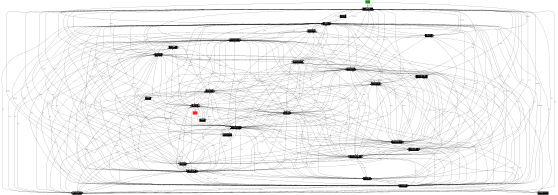

In [35]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

# max_node = 5
# max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Count'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Count'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, count = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in pro_det.iterrows():
    g.node(row[activity],label=row[activity] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity]]['Count'].sum()))
    g.node(row[activity+'_2'],label=row[activity+'_2'] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity+'_2']]['Count'].sum()))

for index, row in pro_det.iterrows():
    startevent, endevent, count = [str(i) for i in row]
    g.edge(str(row[activity]), str(row[activity+'_2']), label= "  " + count)
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(gra_coun[gra_coun[activity] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Count'].sum()) , _attributes={'color':'red', 'fontcolor':'white'})
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, count = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g

### Transition Matrix<a class="anchor" id="TransitionMatrix"></a>

The aim of this transition matrix shows how the cases moves from one event to another. The row shows the starting event, while the column shows the preceeding events, while the numbers indicates how many times this was done. For example, <i>Billing Block changed</i> was followed by <i>Billing Block set</i> once. 

The following were noted:
- <b>Sequence-related issues</b>:
    - <b>Goods Issue to Credit Check Denied</b>: There are 40 cases where the credit check was denied after the Goods Issue activity. This indicates a lack of control in the system as goods could be issued to customers who are not credit worthy.
    - <b>Goods Issue to Delivery Block Set</b>: There are 15 cases where the Goods Issue activity was followed by Delivery Block Set activity. This happened a total of 13 times.
    - <b>Delivery Block Set to Create Delivery</b>: There are 134 cases where despite the Delivery Block Set activity was immediately followed by Create Delivery.
    - <b>Delivery Block Set to Goods Issue</b>: This occures in 4 cases.
- <b>Repeated activities</b>: There were several repeated activities. They include the following amongst others:
    - Create delivery
    - Goods issue
    - Change scheduled date
    - Pro forma invoice
    
- <b>Unwanted activities</b>: Looking at the variants above, we can see that there are about 6 major activities in the top 5 variants. They include:
    - Create Sales Order Item
    - Create Invoice
    - Create Delivery
    - Goods Issue
    - Pro forma invoice
    - Create Quotation
    
    The remaining activities are considered Unwanted activities. Further analysis is carried out on Microsoft PowerBI
    
- <b>Connections</b>: The connection column below shows the connections between events i.e., from the preceeding activity to the next activity. From this, there are 349 possible connections.

Further analysis and visualisation is done in Microsoft PowerBI

In [36]:
def process_details_test(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    return df_1

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(process_details_test(df_final, caseid, timestamp, activity).pivot_table(index=activity, columns=activity+'_2', values=caseid, aggfunc='count').fillna(0))

# process_details_test(df_final, '_CASE_KEY', 'EVENTTIME', 'ACTIVITY_EN').pivot_table(index='ACTIVITY_EN', columns='ACTIVITY_EN_2', values='_CASE_KEY',aggfunc='count').fillna(0)

ACTIVITY_EN_2,Billing Block changed,Billing Block removed,Billing Block set,Change Customer,Change Delivery Amount,Change Material,Change Net Price,Change Plant,Change Reason for rejection,Change Route,Change Scheduled date,Change Shipping Terms,Create Delivery,Create Invoice,Create Quotation,Create Sales Order Item,Credit Check Denied,Credit Check Release,Credit memo,Debit memo,Delivery Block changed,Delivery Block removed,Delivery Block set,Goods Issue,Invoice cancellation,Pro forma invoice,Remove Reason for rejection,Set Reason for rejection
ACTIVITY_EN,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Billing Block changed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Billing Block removed,0.0,0.0,3.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,19.0,13.0,50.0,280.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,23.0,0.0,30.0,0.0,4.0,0.0,0.0
Billing Block set,0.0,65.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,26.0,3.0,26.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,2.0,7.0,20.0,17.0,0.0,0.0,5.0,0.0
Change Customer,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Change Delivery Amount,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Change Material,0.0,0.0,0.0,0.0,0.0,1.0,76.0,0.0,0.0,0.0,67.0,5.0,55.0,1.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,0.0,1.0,70.0,0.0,0.0,9.0,0.0
Change Net Price,0.0,59.0,20.0,4.0,1.0,49.0,63.0,0.0,1.0,15.0,241.0,53.0,625.0,244.0,0.0,0.0,13.0,418.0,0.0,0.0,2.0,27.0,14.0,275.0,4.0,20.0,110.0,6.0
Change Plant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Change Reason for rejection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,21.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,47.0,0.0


In [38]:
proc_det = process_details_test(df_final, caseid, timestamp, activity)
proc_det

,_CASE_KEY,EVENTTIME,ACTIVITY_EN,_CASE_KEY_2,EVENTTIME_2,ACTIVITY_EN_2
0,140449,2009-01-02 03:10:00,Create Sales Order Item,140449.0,2009-01-02 03:30:00,Create Delivery
1,140449,2009-01-02 03:30:00,Create Delivery,140449.0,2009-01-02 04:30:00,Goods Issue
2,140449,2009-01-02 04:30:00,Goods Issue,140449.0,2009-01-02 11:07:00,Create Invoice
4,140483,2009-01-02 07:15:00,Create Delivery,140483.0,2009-01-02 08:10:00,Create Sales Order Item
5,140483,2009-01-02 08:10:00,Create Sales Order Item,140483.0,2009-01-02 08:15:00,Goods Issue
...,...,...,...,...,...,...
369919,1166893,2010-02-01 09:25:00,Remove Reason for rejection,1166893.0,2010-02-01 10:18:00,Goods Issue
369920,1166893,2010-02-01 10:18:00,Goods Issue,1166893.0,2010-02-01 14:52:00,Create Invoice
369922,1166902,2010-01-31 16:44:00,Create Sales Order Item,1166902.0,2010-02-04 03:37:00,Create Delivery
369923,1166902,2010-02-04 03:37:00,Create Delivery,1166902.0,2010-02-04 04:37:00,Goods Issue


In [39]:
proc_det['Connection'] = proc_det[activity] + " --> " + proc_det[activity+'_2']
proc_det

,_CASE_KEY,EVENTTIME,ACTIVITY_EN,_CASE_KEY_2,EVENTTIME_2,ACTIVITY_EN_2,Connection
0,140449,2009-01-02 03:10:00,Create Sales Order Item,140449.0,2009-01-02 03:30:00,Create Delivery,Create Sales Order Item --> Create Delivery
1,140449,2009-01-02 03:30:00,Create Delivery,140449.0,2009-01-02 04:30:00,Goods Issue,Create Delivery --> Goods Issue
2,140449,2009-01-02 04:30:00,Goods Issue,140449.0,2009-01-02 11:07:00,Create Invoice,Goods Issue --> Create Invoice
4,140483,2009-01-02 07:15:00,Create Delivery,140483.0,2009-01-02 08:10:00,Create Sales Order Item,Create Delivery --> Create Sales Order Item
5,140483,2009-01-02 08:10:00,Create Sales Order Item,140483.0,2009-01-02 08:15:00,Goods Issue,Create Sales Order Item --> Goods Issue
...,...,...,...,...,...,...,...
369919,1166893,2010-02-01 09:25:00,Remove Reason for rejection,1166893.0,2010-02-01 10:18:00,Goods Issue,Remove Reason for rejection --> Goods Issue
369920,1166893,2010-02-01 10:18:00,Goods Issue,1166893.0,2010-02-01 14:52:00,Create Invoice,Goods Issue --> Create Invoice
369922,1166902,2010-01-31 16:44:00,Create Sales Order Item,1166902.0,2010-02-04 03:37:00,Create Delivery,Create Sales Order Item --> Create Delivery
369923,1166902,2010-02-04 03:37:00,Create Delivery,1166902.0,2010-02-04 04:37:00,Goods Issue,Create Delivery --> Goods Issue


In [40]:
proc_det['Connection'].nunique()

349

In [41]:
# proc_det.to_csv('Process_details.csv', index=False)

## Timing Analysis<a class="anchor" id="TimingAnalysis"></a>

### Case duration<a class="anchor" id="CaseDuration"></a>

.........

In [42]:
def case_duration(df, case_id, dates):
    case_dur = df.copy()
    case_dur['Count'] = case_dur.groupby(case_id).cumcount()+1
    case_dur = case_dur.pivot(index=case_id, columns='Count', values=dates)
    case_dur_col = case_dur.columns
    case_dur['Max'] = case_dur.apply(max, axis=1)
    case_dur['Case_Duration_days'] = (case_dur['Max'] - case_dur[1]).dt.days
    case_dur = case_dur.drop(case_dur_col, axis=1)
    case_dur.reset_index(inplace=True)    
    return case_dur

In [43]:
case_duration(df_final, caseid, timestamp).drop('Max', axis=1)

Count,_CASE_KEY,Case_Duration_days
0,140449,0
1,140483,0
2,140493,348
3,140499,0
4,140502,0
...,...,...
66294,1166773,5
66295,1166852,3
66296,1166853,3
66297,1166893,0


### Event duration<a class="anchor" id="EventDuration"></a>

Here we wanted to see the median days spent on each activity. From the below, Invoice cancellation activity has the highest medium time, followed by credit memo, then debit memo.

In [44]:
df_final.groupby([activity])['Duration'].median().round(0)

ACTIVITY_EN
Billing Block changed           0.0
Billing Block removed           2.0
Billing Block set               0.0
Change Customer                 0.0
Change Delivery Amount          0.0
Change Material                 0.0
Change Net Price                0.0
Change Plant                    0.0
Change Reason for rejection     0.0
Change Route                    0.0
Change Scheduled date           0.0
Change Shipping Terms           0.0
Create Delivery                 0.0
Create Invoice                  1.0
Create Quotation                0.0
Create Sales Order Item         0.0
Credit Check Denied             0.0
Credit Check Release            0.0
Credit memo                     8.0
Debit memo                      5.0
Delivery Block changed          0.0
Delivery Block removed          0.0
Delivery Block set              0.0
Goods Issue                     0.0
Invoice cancellation           12.0
Pro forma invoice               0.0
Remove Reason for rejection     0.0
Set Reason for r

In [45]:
df_final.groupby([activity])['Duration'].max().round(0)

ACTIVITY_EN
Billing Block changed            3.0
Billing Block removed          249.0
Billing Block set               29.0
Change Customer                  6.0
Change Delivery Amount           0.0
Change Material                 14.0
Change Net Price               107.0
Change Plant                     0.0
Change Reason for rejection      2.0
Change Route                    57.0
Change Scheduled date          518.0
Change Shipping Terms           69.0
Create Delivery                690.0
Create Invoice                 174.0
Create Quotation               150.0
Create Sales Order Item        720.0
Credit Check Denied            313.0
Credit Check Release            45.0
Credit memo                     14.0
Debit memo                       8.0
Delivery Block changed         126.0
Delivery Block removed         677.0
Delivery Block set             684.0
Goods Issue                      0.0
Invoice cancellation            93.0
Pro forma invoice               39.0
Remove Reason for rejectio

In [46]:
distinct_df = distinct_df.merge(case_duration(df_final,caseid,timestamp).drop('Max', axis=1))
distinct_df

Count,Variants,Trace,No of occurance,_CASE_KEY,Case_Duration_days
0,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140449,0
1,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140502,0
2,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140536,2
3,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140642,0
4,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140648,0
...,...,...,...,...,...
66294,3868,"Create Sales Order Item,Change Route,Change Sh...",1,667325,13
66295,3869,"Create Sales Order Item,Change Route,Change Sh...",1,993613,11
66296,3870,"Create Sales Order Item,Change Route,Change Sh...",1,787022,8
66297,3871,"Create Sales Order Item,Change Route,Change Sh...",1,617442,16


In [47]:
distinct_df = distinct_df.merge(df_final.groupby(caseid).head(1), on=caseid)
distinct_df

,Variants,Trace,No of occurance,_CASE_KEY,Case_Duration_days,ACTIVITY_EN,EVENTTIME,Duration,Event_ID
0,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140449,0,Create Sales Order Item,2009-01-02 03:10:00,0.0,1
1,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140502,0,Create Sales Order Item,2009-01-05 03:00:00,0.0,1
2,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140536,2,Create Sales Order Item,2009-01-05 10:43:00,0.0,1
3,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140642,0,Create Sales Order Item,2009-01-06 08:14:00,0.0,1
4,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140648,0,Create Sales Order Item,2009-01-06 08:14:00,0.0,1
...,...,...,...,...,...,...,...,...,...
66294,3868,"Create Sales Order Item,Change Route,Change Sh...",1,667325,13,Create Sales Order Item,2009-07-24 10:29:00,0.0,1
66295,3869,"Create Sales Order Item,Change Route,Change Sh...",1,993613,11,Create Sales Order Item,2009-11-19 09:43:00,0.0,1
66296,3870,"Create Sales Order Item,Change Route,Change Sh...",1,787022,8,Create Sales Order Item,2009-09-08 11:51:00,0.0,1
66297,3871,"Create Sales Order Item,Change Route,Change Sh...",1,617442,16,Create Sales Order Item,2009-07-07 11:55:00,0.0,1


In [48]:
first_last = activity_list(df_final,caseid,activity).reset_index()
first_last = first_last[[caseid,'Last Activity','First Activity']]
first_last

Count,_CASE_KEY,Last Activity,First Activity
0,140449,Create Invoice,Create Sales Order Item
1,140483,Create Invoice,Create Delivery
2,140493,Create Invoice,Create Quotation
3,140499,Create Invoice,Create Delivery
4,140502,Create Invoice,Create Sales Order Item
...,...,...,...
66294,1166773,Create Invoice,Create Sales Order Item
66295,1166852,Create Invoice,Create Sales Order Item
66296,1166853,Create Invoice,Create Sales Order Item
66297,1166893,Create Invoice,Create Sales Order Item


In [49]:
distinct_df = distinct_df.merge(first_last, on=caseid)
distinct_df

,Variants,Trace,No of occurance,_CASE_KEY,Case_Duration_days,ACTIVITY_EN,EVENTTIME,Duration,Event_ID,Last Activity,First Activity
0,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140449,0,Create Sales Order Item,2009-01-02 03:10:00,0.0,1,Create Invoice,Create Sales Order Item
1,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140502,0,Create Sales Order Item,2009-01-05 03:00:00,0.0,1,Create Invoice,Create Sales Order Item
2,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140536,2,Create Sales Order Item,2009-01-05 10:43:00,0.0,1,Create Invoice,Create Sales Order Item
3,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140642,0,Create Sales Order Item,2009-01-06 08:14:00,0.0,1,Create Invoice,Create Sales Order Item
4,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140648,0,Create Sales Order Item,2009-01-06 08:14:00,0.0,1,Create Invoice,Create Sales Order Item
...,...,...,...,...,...,...,...,...,...,...,...
66294,3868,"Create Sales Order Item,Change Route,Change Sh...",1,667325,13,Create Sales Order Item,2009-07-24 10:29:00,0.0,1,Create Invoice,Create Sales Order Item
66295,3869,"Create Sales Order Item,Change Route,Change Sh...",1,993613,11,Create Sales Order Item,2009-11-19 09:43:00,0.0,1,Create Invoice,Create Sales Order Item
66296,3870,"Create Sales Order Item,Change Route,Change Sh...",1,787022,8,Create Sales Order Item,2009-09-08 11:51:00,0.0,1,Create Invoice,Create Sales Order Item
66297,3871,"Create Sales Order Item,Change Route,Change Sh...",1,617442,16,Create Sales Order Item,2009-07-07 11:55:00,0.0,1,Create Invoice,Create Sales Order Item


In [50]:
distinct_df_extract_2 = df_final.groupby('_CASE_KEY').tail(1)
distinct_df_extract_2 = distinct_df_extract_2[['_CASE_KEY','EVENTTIME']]
distinct_df_extract_2.rename(columns = {'EVENTTIME':'EndDate'}, inplace = True)
distinct_df_extract_2

,_CASE_KEY,EndDate
3,140449,2009-01-02 11:07:00
7,140483,2009-01-02 11:07:00
12,140493,2009-01-03 10:58:00
16,140499,2009-01-03 10:58:00
20,140502,2009-01-05 11:06:00
...,...,...
369905,1166773,2010-02-05 03:07:00
369910,1166852,2010-02-04 11:03:00
369915,1166853,2010-02-04 11:03:00
369921,1166893,2010-02-01 14:52:00


In [51]:
distinct_df = distinct_df.merge(distinct_df_extract_2, on='_CASE_KEY')
distinct_df

,Variants,Trace,No of occurance,_CASE_KEY,Case_Duration_days,ACTIVITY_EN,EVENTTIME,Duration,Event_ID,Last Activity,First Activity,EndDate
0,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140449,0,Create Sales Order Item,2009-01-02 03:10:00,0.0,1,Create Invoice,Create Sales Order Item,2009-01-02 11:07:00
1,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140502,0,Create Sales Order Item,2009-01-05 03:00:00,0.0,1,Create Invoice,Create Sales Order Item,2009-01-05 11:06:00
2,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140536,2,Create Sales Order Item,2009-01-05 10:43:00,0.0,1,Create Invoice,Create Sales Order Item,2009-01-08 09:54:00
3,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140642,0,Create Sales Order Item,2009-01-06 08:14:00,0.0,1,Create Invoice,Create Sales Order Item,2009-01-06 11:03:00
4,1,"Create Sales Order Item,Create Delivery,Goods ...",14979,140648,0,Create Sales Order Item,2009-01-06 08:14:00,0.0,1,Create Invoice,Create Sales Order Item,2009-01-06 11:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66294,3868,"Create Sales Order Item,Change Route,Change Sh...",1,667325,13,Create Sales Order Item,2009-07-24 10:29:00,0.0,1,Create Invoice,Create Sales Order Item,2009-08-06 11:03:00
66295,3869,"Create Sales Order Item,Change Route,Change Sh...",1,993613,11,Create Sales Order Item,2009-11-19 09:43:00,0.0,1,Create Invoice,Create Sales Order Item,2009-11-30 11:01:00
66296,3870,"Create Sales Order Item,Change Route,Change Sh...",1,787022,8,Create Sales Order Item,2009-09-08 11:51:00,0.0,1,Create Invoice,Create Sales Order Item,2009-09-17 03:05:00
66297,3871,"Create Sales Order Item,Change Route,Change Sh...",1,617442,16,Create Sales Order Item,2009-07-07 11:55:00,0.0,1,Create Invoice,Create Sales Order Item,2009-07-24 03:08:00


In [52]:
# distinct_df.to_csv('Distinct_log.csv', index=False)

In [53]:
event_duration = df_final.pivot_table(index=caseid, columns=activity, values=timestamp, aggfunc='first').reset_index()
event_duration

ACTIVITY_EN,_CASE_KEY,Billing Block changed,Billing Block removed,Billing Block set,Change Customer,Change Delivery Amount,Change Material,Change Net Price,Change Plant,Change Reason for rejection,...,Credit memo,Debit memo,Delivery Block changed,Delivery Block removed,Delivery Block set,Goods Issue,Invoice cancellation,Pro forma invoice,Remove Reason for rejection,Set Reason for rejection
0,140449,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2009-01-02 04:30:00,NaT,NaT,NaT,NaT
1,140483,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2009-01-02 08:15:00,NaT,NaT,NaT,NaT
2,140493,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2009-01-02 17:15:00,NaT,NaT,NaT,NaT
3,140499,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2009-01-02 17:15:00,NaT,NaT,NaT,NaT
4,140502,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2009-01-05 04:30:00,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66294,1166773,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2010-02-01 04:33:00,NaT,2010-02-01 10:22:00,NaT,NaT
66295,1166852,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2010-02-02 04:39:00,NaT,2010-02-02 09:44:00,NaT,NaT
66296,1166853,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2010-02-02 04:39:00,NaT,2010-02-02 09:44:00,NaT,NaT
66297,1166893,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2010-02-01 10:18:00,NaT,NaT,2010-02-01 09:25:00,NaT


In [54]:
event_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66299 entries, 0 to 66298
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   _CASE_KEY                    66299 non-null  int64         
 1   Billing Block changed        5 non-null      datetime64[ns]
 2   Billing Block removed        484 non-null    datetime64[ns]
 3   Billing Block set            199 non-null    datetime64[ns]
 4   Change Customer              22 non-null     datetime64[ns]
 5   Change Delivery Amount       1 non-null      datetime64[ns]
 6   Change Material              313 non-null    datetime64[ns]
 7   Change Net Price             2124 non-null   datetime64[ns]
 8   Change Plant                 1 non-null      datetime64[ns]
 9   Change Reason for rejection  95 non-null     datetime64[ns]
 10  Change Route                 449 non-null    datetime64[ns]
 11  Change Scheduled date        12475 non-nu

In [55]:
# event_duration.to_csv('Event_duration.csv', index=False)

## Open Orders <a class="anchor" id="OpenOrders"></a>

Here, we extract the uncompleted orders and carried further analysis on Microsoft PowerBI.

In [56]:
open_orders = df_xtract[~((df_xtract['Last Activity'] == 'Create Invoice'))]
#                       | (df_xtract['Last Activity'] == 'Pro forma invoice'))]
open_orders = open_orders.reset_index()
open_orders = open_orders[['_CASE_KEY']]
open_orders = open_orders.merge(df_2, on='_CASE_KEY')
open_orders = open_orders[['_CASE_KEY','ACTIVITY_EN','EVENTTIME']]
open_orders = open_orders.sort_values(by=['_CASE_KEY','EVENTTIME'],ascending=True).reset_index(drop=True)
open_orders

,_CASE_KEY,ACTIVITY_EN,EVENTTIME
0,140567,Create Delivery,2009-01-05 14:15:00
1,140567,Create Sales Order Item,2009-01-05 14:55:00
2,140567,Goods Issue,2009-01-05 15:15:00
3,140567,Create Invoice,2009-01-06 11:03:00
4,140567,Credit memo,2009-02-23 09:18:00
...,...,...,...
111887,1166915,Credit Check Release,2010-02-01 09:26:00
111888,1166924,Create Sales Order Item,2010-01-31 16:50:00
111889,1166924,Credit Check Release,2010-02-01 09:26:00
111890,1166924,Remove Reason for rejection,2010-02-01 09:26:00


In [57]:
open_orders_distinct_df = variant_analysis_df(open_orders, caseid, activity)
open_orders_distinct_df = open_orders_distinct_df.merge(case_duration(open_orders,caseid,timestamp).drop('Max', axis=1))
open_orders_distinct_df = open_orders_distinct_df.merge(open_orders.groupby(caseid).head(1), on=caseid)
open_orders_distinct_df

,Variants,Trace,No of occurance,_CASE_KEY,Case_Duration_days,ACTIVITY_EN,EVENTTIME
0,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,181902,12,Create Sales Order Item,2009-01-06 08:15:00
1,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,182875,6,Create Sales Order Item,2009-01-07 01:08:00
2,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,182893,6,Create Sales Order Item,2009-01-07 01:08:00
3,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,182896,6,Create Sales Order Item,2009-01-07 01:08:00
4,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,184956,1,Create Sales Order Item,2009-01-07 13:53:00
...,...,...,...,...,...,...,...
16519,2898,"Create Sales Order Item,Change Net Price,Creat...",1,516855,20,Create Sales Order Item,2009-05-12 14:56:00
16520,2899,"Create Sales Order Item,Change Net Price,Creat...",1,945539,79,Create Sales Order Item,2009-11-03 10:37:00
16521,2900,"Create Sales Order Item,Change Net Price,Creat...",1,433966,10,Create Sales Order Item,2009-04-09 16:20:00
16522,2901,"Create Sales Order Item,Change Net Price,Credi...",1,802185,10,Create Sales Order Item,2009-09-14 11:03:00


In [58]:
uc_first_last = activity_list(open_orders,caseid,activity).reset_index()
uc_first_last = uc_first_last[[caseid,'Last Activity','First Activity']]
uc_first_last

Count,_CASE_KEY,Last Activity,First Activity
0,140567,Credit memo,Create Delivery
1,140662,Goods Issue,Create Sales Order Item
2,140719,Goods Issue,Create Sales Order Item
3,140743,Pro forma invoice,Create Sales Order Item
4,140748,Goods Issue,Create Delivery
...,...,...,...
16519,1166900,Change Scheduled date,Create Sales Order Item
16520,1166912,Change Net Price,Create Sales Order Item
16521,1166915,Credit Check Release,Create Sales Order Item
16522,1166924,Remove Reason for rejection,Create Sales Order Item


In [59]:
open_orders_distinct_df = open_orders_distinct_df.merge(uc_first_last, on=caseid)
open_orders_distinct_df

,Variants,Trace,No of occurance,_CASE_KEY,Case_Duration_days,ACTIVITY_EN,EVENTTIME,Last Activity,First Activity
0,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,181902,12,Create Sales Order Item,2009-01-06 08:15:00,Pro forma invoice,Create Sales Order Item
1,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,182875,6,Create Sales Order Item,2009-01-07 01:08:00,Pro forma invoice,Create Sales Order Item
2,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,182893,6,Create Sales Order Item,2009-01-07 01:08:00,Pro forma invoice,Create Sales Order Item
3,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,182896,6,Create Sales Order Item,2009-01-07 01:08:00,Pro forma invoice,Create Sales Order Item
4,1,"Create Sales Order Item,Create Delivery,Goods ...",4836,184956,1,Create Sales Order Item,2009-01-07 13:53:00,Pro forma invoice,Create Sales Order Item
...,...,...,...,...,...,...,...,...,...
16519,2898,"Create Sales Order Item,Change Net Price,Creat...",1,516855,20,Create Sales Order Item,2009-05-12 14:56:00,Change Shipping Terms,Create Sales Order Item
16520,2899,"Create Sales Order Item,Change Net Price,Creat...",1,945539,79,Create Sales Order Item,2009-11-03 10:37:00,Credit memo,Create Sales Order Item
16521,2900,"Create Sales Order Item,Change Net Price,Creat...",1,433966,10,Create Sales Order Item,2009-04-09 16:20:00,Change Shipping Terms,Create Sales Order Item
16522,2901,"Create Sales Order Item,Change Net Price,Credi...",1,802185,10,Create Sales Order Item,2009-09-14 11:03:00,Delivery Block changed,Create Sales Order Item


In [60]:
df_xtract['Last Activity'].value_counts()

Create Invoice                 66299
Pro forma invoice              10317
Goods Issue                     1639
Change Shipping Terms           1099
Delivery Block changed           806
Credit memo                      607
Create Sales Order Item          587
Change Scheduled date            393
Set Reason for rejection         270
Delivery Block removed           238
Credit Check Release             215
Remove Reason for rejection      169
Delivery Block set                49
Change Net Price                  45
Billing Block removed             30
Debit memo                        21
Change Reason for rejection       16
Change Route                      11
Billing Block set                  6
Credit Check Denied                4
Change Material                    1
Change Customer                    1
Name: Last Activity, dtype: int64

In [61]:
# open_orders.to_csv('open_orders.csv', index=False)
# open_orders_distinct_df.to_csv('open_orders_distinct_log.csv', index=False)

In [62]:
# Process details
def process_details_timing(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    df_1['Duration'] = (df_1[timestamp+'_2'] - df_1[timestamp]).dt.days
    
    df_1 = df_1[[case_id, activities, activities+'_2','Duration']]
    df_1 = df_1.groupby([activities,activities+'_2']).agg({'Duration': ['median'], activities:['count']}).reset_index()
    df_1.columns = [activities,activities+'_2', 'Duration', 'Count']
    df_1 = df_1.sort_values(by=['Count'], ascending=False)
    df_1['Duration'] = df_1['Duration'].astype('int')
#     df_1 = df_1.to_frame(name='Count').reset_index()
    return df_1

In [63]:
pro_det_timing = process_details_timing(df_final, caseid, timestamp, activity)
pro_det_timing

,ACTIVITY_EN,ACTIVITY_EN_2,Duration,Count
148,Create Delivery,Goods Issue,0,44861
285,Goods Issue,Create Invoice,0,42145
182,Create Sales Order Item,Create Delivery,2,30557
308,Pro forma invoice,Create Invoice,3,23794
295,Goods Issue,Pro forma invoice,0,23737
...,...,...,...,...
201,Credit Check Denied,Delivery Block set,0,1
200,Credit Check Denied,Delivery Block removed,0,1
184,Create Sales Order Item,Create Quotation,0,1
177,Create Sales Order Item,Change Plant,0,1


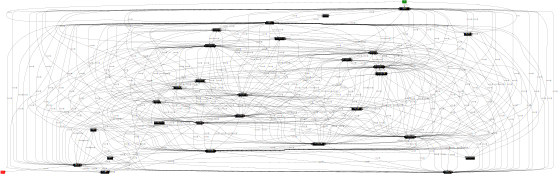

In [64]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

# max_node = 5
# max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Count'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Count'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, count = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in pro_det_timing.iterrows():
    g.node(row[activity],label=row[activity] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity]]['Count'].sum()))
    g.node(row[activity+'_2'],label=row[activity+'_2'] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity+'_2']]['Count'].sum()))

for index, row in pro_det_timing.iterrows():
    startevent, endevent, duration, count = [str(i) for i in row]
    g.edge(str(row[activity]), str(row[activity+'_2']), label= "  " + duration+"day(s)")
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(gra_coun[gra_coun[activity] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Count'].sum()) , _attributes={'color':'red', 'fontcolor':'white'})
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, count = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g